In [8]:
from graph_tool.all import *
import pandas as pd
from sklearn import preprocessing

In [9]:
df = pd.read_csv('/Users/eduardorodriguez/Desktop/TFM/DATA/banksim/net.csv')
print(df.shape)
df.head()

(594643, 5)


,Source,Target,Weight,typeTrans,fraud
0,'C1093826151','M348934600',4.55,'es_transportation',0
1,'C352968107','M348934600',39.68,'es_transportation',0
2,'C2054744914','M1823072687',26.89,'es_transportation',0
3,'C1760612790','M348934600',17.25,'es_transportation',0
4,'C757503768','M348934600',35.72,'es_transportation',0


In [10]:
le = preprocessing.LabelEncoder()
le.fit(list(set(df['Source'])))
df['Source'] = le.transform(df['Source'])
le.fit(list(set(df['Target'])))
df['Target'] = le.transform(df['Target'])
df = df[:]
df.head()

,Source,Target,Weight,typeTrans,fraud
0,210,30,4.55,'es_transportation',0
1,2753,30,39.68,'es_transportation',0
2,2285,18,26.89,'es_transportation',0
3,1650,30,17.25,'es_transportation',0
4,3585,30,35.72,'es_transportation',0


In [11]:
df = df.drop(['Weight', 'typeTrans', 'fraud'], axis = 1)

In [16]:
df = pd.DataFrame({"node1": [1,2,1,3,4,1], "node2": [2,3,4,1,3,5]})

In [17]:
# Define Graph
g = Graph(directed=False)
# Add Edges
g.add_edge_list(df.values.tolist())

In [19]:
mc, part = g.min_cut(g, weight = [0,1,0,1,0,1])
graph_draw(g, pos=pos, edge_pen_width=weight, vertex_fill_color=part, output="example-min-cut.pdf")

AttributeError: 'Graph' object has no attribute 'min_cut'

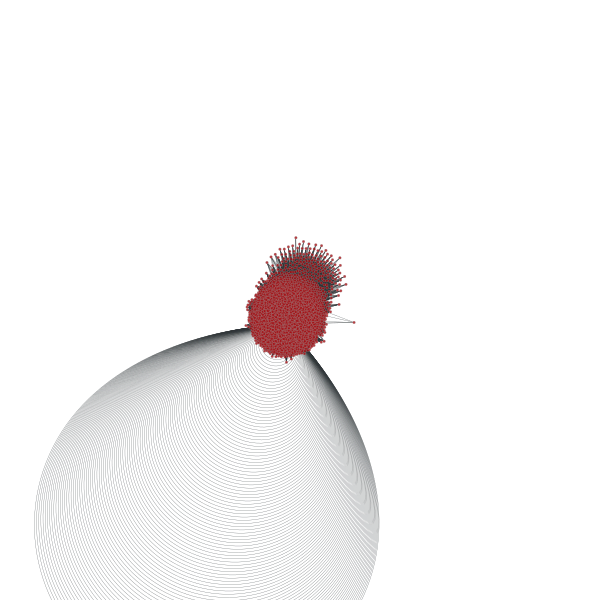

<PropertyMap object with key type 'Vertex' and value type 'vector<double>', for Graph 0x1a2bbadf98, at 0x106155588>

In [14]:
graph_draw(g, output="GRAPH BANKSIM.pdf")